In [2]:
import torch as th

In [8]:
matrix = th.randn((100, 3, 3))

hej = th.matmul(matrix, th.tensor([0,0,-1.]).view(1,3,1))

camera_directions = th.matmul(matrix[:, :3, :3], th.tensor([0,0,-1.]).view(1,3,1)).squeeze(-1) # th.stack([th.tensor([0., 0., -1.])@c2w[:3, :3].T for c2w in camera_to_worlds.values()], dim=0)
camera_directions2 = th.stack([th.tensor([0., 0., -1.])@c2w[:3, :3].T for c2w in matrix], dim=0)

In [24]:
meshgrid = th.randn((800 * 800, 3))
matrix = th.randn((100, 4, 4))

hej = matrix[:, :3, 3].unsqueeze(1).repeat(1,meshgrid.shape[0],1)


RuntimeError: The size of tensor a (640000) must match the size of tensor b (64000000) at non-singleton dimension 1

In [29]:
th.matmul(matrix[:, :3, :3].unsqueeze(1), meshgrid.unsqueeze(0).unsqueeze(-1)).squeeze(-1) 

torch.Size([100, 640000, 3, 1])

In [30]:
th.matmul(matrix[:, :3, :3], meshgrid.unsqueeze(-1)).shape

RuntimeError: The size of tensor a (100) must match the size of tensor b (640000) at non-singleton dimension 0

In [31]:
matrix[:, :3, :3].unsqueeze(1).shape

torch.Size([100, 1, 3, 3])

In [27]:
meshgrid.unsqueeze(0).unsqueeze(-1).shape

torch.Size([1, 640000, 3, 1])

In [34]:
th.tensor([[0,0,1], [0,1,1], [0,2,3]]).view(-1)

tensor([0, 0, 1, 0, 1, 1, 0, 2, 3])

In [39]:
def _get_directions_meshgrid(image_width: int, image_height: int, focal_length: float) -> th.Tensor:
    """
    Creates a generic meshgrid of directions that can be transformed to be the direction for any camera by applying the camera to world matrix.
    Returns the meshgrid flattened to (H*W, 3).
    """
    # Create unit directions (H, W, 3) in camera space
    # NOTE: Initially normalized such that z=-1 via the focal length.
    #  Camera is looking in the negative z direction.
    #  y-axis is also flipped.
    y, x = th.meshgrid(
        -th.linspace(-(image_height-1)/2, (image_height-1)/2, image_height) / focal_length,
        th.linspace(-(image_width-1)/2, (image_width-1)/2, image_width) / focal_length,
        indexing="ij"
    )
    directions = th.stack((x, y, -th.ones_like(x)), dim=-1)
    directions /= th.norm(directions, p=2, dim=-1, keepdim=True)

    return directions

dirs = _get_directions_meshgrid(800, 1000, 1.0)

In [40]:
dirs.shape

torch.Size([1000, 800, 3])

In [42]:
th.tensor([[0,0,1], [0,1,1]])[0]

tensor([0, 0, 1])

In [50]:
th.linalg.norm(th.tensor([[0,4.,3.], [0,1,1.]]), dim=1)

tensor([5.0000, 1.4142])

In [46]:
th.sqrt(th.tensor([2.]))

tensor([1.4142])

In [85]:
from dataset import ImagePoseDataset as new 
from dataset_old_but_new import ImagePoseDataset as old



new = new(40, 40, "../data/lego/train", "../data/lego/transforms_train.json", rotation_noise_sigma=0.0, translation_noise_sigma=0.0)
old = old(40, 40, "../data/lego/train", "../data/lego/transforms_train.json", gaussian_blur_kernel_size=1)

In [86]:
my_image = th.zeros((3, 40, 40))
for i in range(40): 
    for j in range(40):
        my_image[:, i, j] = (1 + new[40*40 + 40*i + j][2]) / 2 

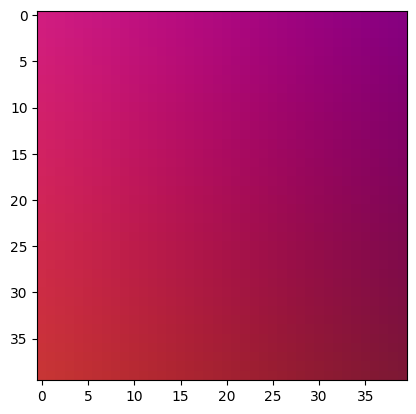

In [87]:
import matplotlib.pyplot as plt

plt.imshow(my_image.permute(1, 2, 0))
plt.show()


In [88]:
my_image2 = th.zeros((3, 40, 40))
for i in range(40): 
    for j in range(40):
        my_image2[:, i, j] = (1 + old[40*40 +40*i + j][2]) / 2 

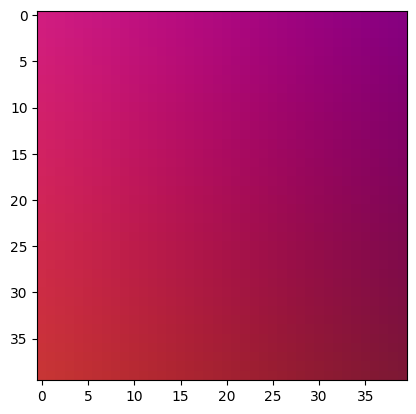

In [89]:

plt.imshow(my_image2.permute(1, 2, 0))
plt.show()

In [90]:
(my_image - my_image2)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [5]:
import torch as th 

camera_dirs_pred = th.randn((100, 3))
camera_dirs_raw = th.randn((100, 3))    

hej = th.arccos(th.matmul(camera_dirs_pred.unsqueeze(-2), camera_dirs_raw.unsqueeze(-1)).squeeze(-1).squeeze(-1) / (th.norm(camera_dirs_pred, dim=1) * th.norm(camera_dirs_raw, dim=1)))/th.pi

hej

tensor([0.4978, 0.5324, 0.7242, 0.6935, 0.7054, 0.2535, 0.5116, 0.2670, 0.3124,
        0.1687, 0.6152, 0.3358, 0.5499, 0.5711, 0.5360, 0.5153, 0.0911, 0.8794,
        0.3484, 0.1972, 0.7896, 0.5678, 0.4392, 0.5262, 0.7358, 0.1702, 0.4498,
        0.4884, 0.3173, 0.0655, 0.8593, 0.9697, 0.4620, 0.6225, 0.5782, 0.8432,
        0.5916, 0.7083, 0.3509, 0.2229, 0.1867, 0.1060, 0.2741, 0.6834, 0.3708,
        0.1733, 0.5923, 0.4765, 0.2833, 0.3239, 0.4557, 0.8183, 0.9143, 0.3167,
        0.5675, 0.3197, 0.8683, 0.2566, 0.6615, 0.2017, 0.4449, 0.2660, 0.5409,
        0.5073, 0.6479, 0.6595, 0.1130, 0.7027, 0.0950, 0.2081, 0.4625, 0.4014,
        0.7116, 0.9423, 0.2203, 0.6533, 0.0491, 0.4126, 0.1337, 0.4036, 0.4984,
        0.0586, 0.2759, 0.6003, 0.2050, 0.4668, 0.0392, 0.0792, 0.3799, 0.5944,
        0.8816, 0.2254, 0.7052, 0.4191, 0.4549, 0.2242, 0.4269, 0.8239, 0.5022,
        0.4667])

In [7]:
green = th.tensor([0, 255, 0])

thing = th.randn((100, 1))

green*thing

tensor([[-0.0000e+00, -5.1513e+02, -0.0000e+00],
        [-0.0000e+00, -5.5127e+02, -0.0000e+00],
        [ 0.0000e+00,  3.2983e+02,  0.0000e+00],
        [-0.0000e+00, -5.0698e+00, -0.0000e+00],
        [-0.0000e+00, -7.9055e+01, -0.0000e+00],
        [-0.0000e+00, -2.8602e+02, -0.0000e+00],
        [ 0.0000e+00,  2.9680e+02,  0.0000e+00],
        [ 0.0000e+00,  1.2285e+02,  0.0000e+00],
        [-0.0000e+00, -1.3626e+02, -0.0000e+00],
        [-0.0000e+00, -2.8597e+02, -0.0000e+00],
        [-0.0000e+00, -3.3902e+02, -0.0000e+00],
        [-0.0000e+00, -3.3888e+02, -0.0000e+00],
        [-0.0000e+00, -7.2763e+01, -0.0000e+00],
        [ 0.0000e+00,  1.5861e+00,  0.0000e+00],
        [ 0.0000e+00,  3.6856e+01,  0.0000e+00],
        [ 0.0000e+00,  3.5390e+02,  0.0000e+00],
        [-0.0000e+00, -8.5006e+01, -0.0000e+00],
        [ 0.0000e+00,  4.7467e+01,  0.0000e+00],
        [-0.0000e+00, -5.3040e+02, -0.0000e+00],
        [-0.0000e+00, -3.1435e+02, -0.0000e+00],
        [ 0.0000e+00

In [ ]:
# Transform from PIL image to Tensor
self.transform = cast(
    Callable[[Image.Image], th.Tensor], 
    tv.transforms.Compose([
        # Transform form PIL image to Tensor
        tv.transforms.ToTensor(),
        # Resize image
        tv.transforms.Resize((self.image_height, self.image_width), antialias=True), # type: ignore
        # Transform alpha to white background (removes alpha too)
        tv.transforms.Lambda(ImagePoseDataset.transform_alpha_to_white),
        # Permute channels to (H, W, C)
        # WARN: This is against the convention of PyTorch.
        #  Doing it to enable easier batching of rays.
        tv.transforms.Lambda(ImagePoseDataset.permute_channels)
    ])
)


# Load each image, transform, and store
self.images = {pathlib.PurePath(path).stem: self._open_image(path) for path in os.listdir(self.images_path) }

In [3]:
import os 
import pathlib
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
import torchvision as tv
import torch as th 

img_height = img_width = 100
sigmas = [0, 1.0, 2.0]

images_path = "../data/lego/train"
open_image = lambda path: Image.open(os.path.join(images_path, path))

In [7]:
[0.0000, 0.4800, 1.0800, 1.9200, 3.0000][:,:,-1]

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\david\AppData\Local\Temp\ipykernel_20452\4148788618.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [0.0000, 0.4800, 1.0800, 1.9200, 3.0000][:,:,-1]


TypeError: list indices must be integers or slices, not tuple

In [4]:
def _get_images(images_path: str, img_height: int, img_width, sigmas: list[float]) -> dict[str, list[th.Tensor]]: 
    """
    Opens and returns the desired images (with gaussian smoothing applied). 
    Each image is resized, alpha is converted to white, gaussian smoothing is applied, channels are permuted and it is converted to a tensor. 
    """
    # Load the images as PIL.Image's 
    images = {pathlib.PurePath(path).stem: Image.open(os.path.join(images_path, path)) for path in os.listdir(images_path) }

    # Resize each image 
    images = {name: img.resize((img_height, img_width), Image.BICUBIC) for name, img in images.items()}

    # Convert alpha to white background
    white_image = Image.new("RGBA", (img_height, img_width), (255, 255, 255, 255))
    images = {name: Image.alpha_composite(white_image, img).convert('RGB') for name, img in images.items()}

    # Apply gaussian smoothing
    images = {name: gaussian_blur(img, sigmas) for name, img in images.items()}

    # Convert to tensor
    PIL_to_tensor = tv.transforms.ToTensor()
    images = {name: th.stack([PIL_to_tensor(img) for img in imgs]) for name, imgs in images.items()}

    # Permute channels to (H, W, C)
    images = {name: th.tensor(imgs).permute(0, 2, 3, 1) for name, imgs in images.items()}

    return images 

def gaussian_blur(img: Image.Image, sigmas: list[float]) -> list[Image.Image]:
    """
    Apply gaussian blurring to the image with the given sigmas.
    """
    imgs = [] 

    # Apply gaussian smoothing
    for sigma in sigmas:
        imgs.append(img.filter(ImageFilter.GaussianBlur(radius=sigma)))

    return imgs

In [5]:
images = _get_images("../data/lego/train/", 40, 40, [0, 0.125, 0.25, 0.5, 1.0, 2.0])

C:\Users\david\AppData\Local\Temp\ipykernel_20452\2808674252.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = {name: th.tensor(imgs).permute(0, 2, 3, 1) for name, imgs in images.items()}


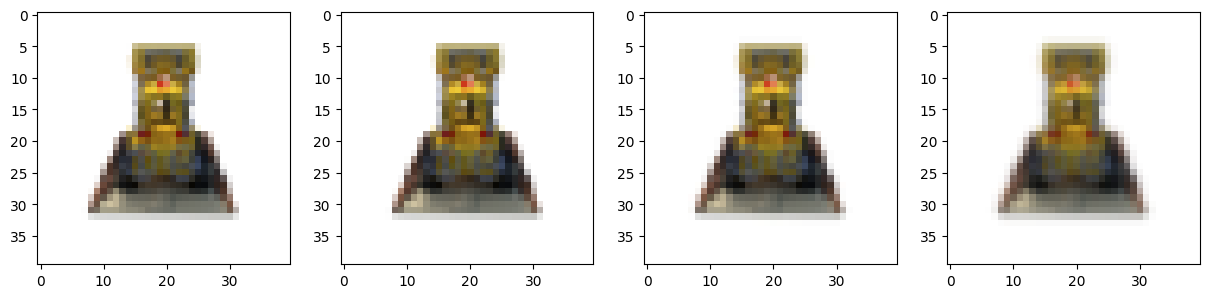

In [6]:
img0 = images["r_0"][0]
img1 = images["r_0"][1]
img2 = images["r_0"][2]
img3 = images["r_0"][3]

# Plot the figues 
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img0)
axs[1].imshow(img1)
axs[2].imshow(img2)
axs[3].imshow(img3)
plt.show()


In [66]:
images_path, img_height, img_width, sigmas = "../data/lego/train/", 400, 400, [0, 1.0, 2.0]

# Load the images as PIL.Image's 
images = {pathlib.PurePath(path).stem: Image.open(os.path.join(images_path, path)) for path in os.listdir(images_path) }

# Resize each image 
images = {name: img.resize((img_height, img_width), Image.BICUBIC) for name, img in images.items()}

# Convert alpha to white background
white_image = Image.new("RGBA", (img_height, img_width), (255, 255, 255, 255))
images = {name: Image.alpha_composite(white_image, img).convert('RGB') for name, img in images.items()}

# # Apply gaussian smoothing
# images = {name: gaussian_blur(img, sigmas) for name, img in images.items()}

# # Permute channels to (H, W, C)
# images = {name: [th.tensor(img).permute(2, 0, 1) for img in imgs] for name, imgs in images.items()}

# # Convert to tensor
# images = {name: [th.stack(imgs, dim=0) for imgs in imgs] for name, imgs in images.items()}

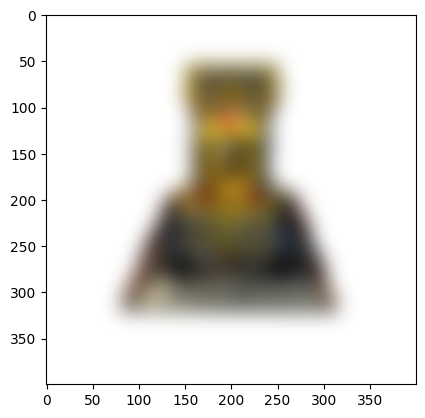

In [72]:
img = images["r_0"]
img = img.filter(ImageFilter.GaussianBlur(radius=10.0))

plt.imshow(img)
plt.show()

RGB RGB


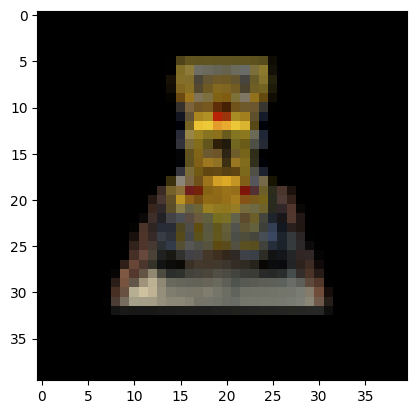

In [43]:
img = Image.open('../data/lego/train/r_0.png')
img = img.resize((image_width, image_height), Image.BICUBIC)
img = Image.alpha_composite(Image.new('RGBA', img.size, (255, 255, 255, 255)), img)
img = img.convert('RGB')


plt.imshow(img)
plt.show()

In [7]:
[i if i % 2 == 0 else 0 for i in range(10)]


[0, 0, 2, 0, 4, 0, 6, 0, 8, 0]

In [10]:
float("2e+5")

200000.0